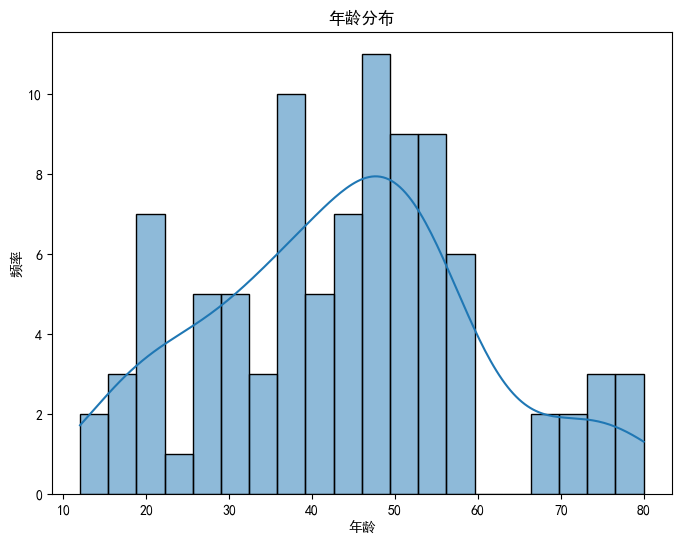

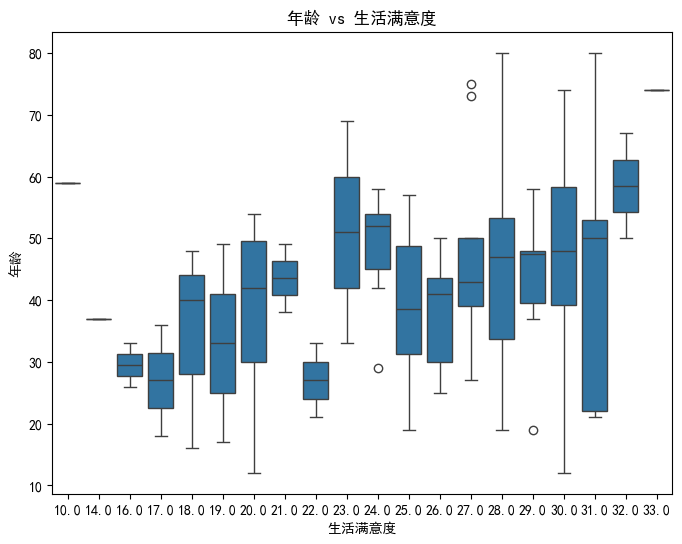

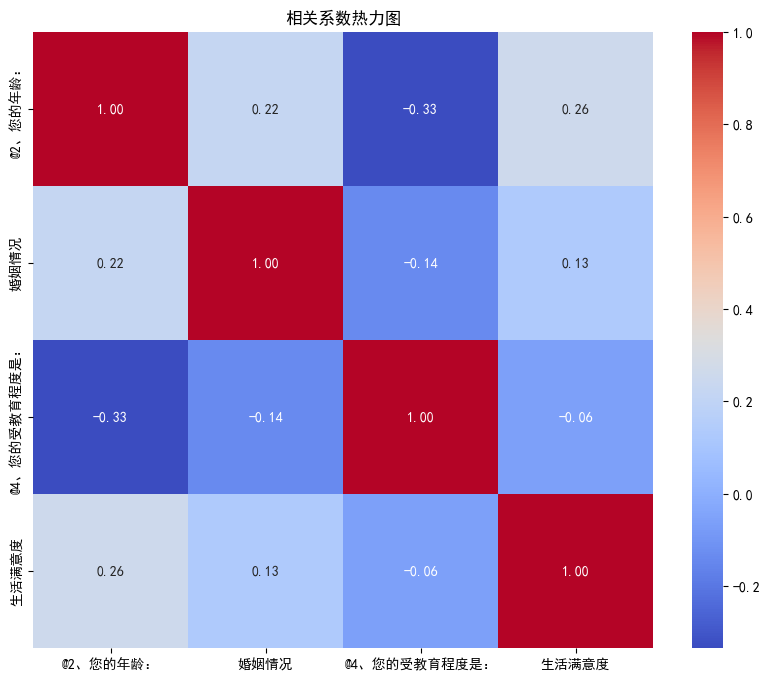

In [6]:
import pyreadstat
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据，命名为 df
file_path = 'demo.sav'
df, _ = pyreadstat.read_sav(file_path)

df.rename(columns={'@10、1您家里有': '家庭规模'}, inplace=True)
df.rename(columns={'@10、2口人，是': '代际'}, inplace=True)
df.rename(columns={'@3、您的婚姻状况：': '婚姻情况'}, inplace=True)
df.rename(columns={'@9、您的月收入大约是多少？': '月收入'}, inplace=True)
# 对指定变量填充空白值
df['婚姻情况'].fillna('已婚', inplace=True)
df['月收入'] = df['月收入'].astype(str)
df['月收入'].fillna('三千元以下', inplace=True)
df['家庭规模'].fillna(6, inplace=True)
df['代际'].replace({'空': None}, inplace=True)
df['代际'].fillna(3, inplace=True)

# 显示数据
pd.set_option('display.max_rows', None) # 显示所有行
pd.set_option('display.max_columns', None) # 显示所有列
pd.set_option('display.width', None) # 设置显示宽度，使所有列都能完整显示

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像时负号'-'显示为方块的问题

# 将研究目标设为生活满意度
target_variable = '生活满意度'

# 进行数据清洗和转换
selected_columns = ['@2、您的年龄：', '婚姻情况', '@4、您的受教育程度是：', target_variable]
# 去除含有缺失值的行或进行其他清洗处理
cleaned_data = df[selected_columns].dropna()

# 单变量分析，选择年龄进行分析
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_data['@2、您的年龄：'], bins=20, kde=True)
plt.title('年龄分布')
plt.xlabel('年龄')
plt.ylabel('频率')
plt.show()

# 双变量分析，选择年龄和生活满意度进行分析
plt.figure(figsize=(8, 6))
sns.boxplot(x=target_variable, y='@2、您的年龄：', data=cleaned_data)
plt.title('年龄 vs 生活满意度')
plt.xlabel('生活满意度')
plt.ylabel('年龄')
plt.show()

# 多变量分析，使用相关系数矩阵
correlation_matrix = cleaned_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('相关系数热力图')
plt.show()
